# Exploratory Analysis For Uber Dataset

In [1]:
#pip install package_name
#pip freeze
# importing basic packages
import numpy as np
import pandas as pd
import os

In [2]:
# Setting the directory paths
WORKING_DIR = os.getcwd()
data_file_name = 'Uber_Data.csv'
DATA_DIR = 'data'
DATA = os.path.join(WORKING_DIR, DATA_DIR, data_file_name)

In [3]:
# Loading the dataset and making a copy
df_orig = pd.read_csv(DATA)
df = df_orig

In [4]:
# look at top 5 observations
print(df.head())

          pickup_dt    borough  pickups  spd   vsb  temp  dewp     slp  pcp01  \
0  01-01-2015 01:00      Bronx      152  5.0  10.0  30.0   7.0  1023.5    0.0   
1  01-01-2015 01:00   Brooklyn     1519  5.0  10.0   NaN   7.0  1023.5    0.0   
2  01-01-2015 01:00        EWR        0  5.0  10.0  30.0   7.0  1023.5    0.0   
3  01-01-2015 01:00  Manhattan     5258  5.0  10.0  30.0   7.0  1023.5    0.0   
4  01-01-2015 01:00     Queens      405  5.0  10.0  30.0   7.0  1023.5    0.0   

   pcp06  pcp24   sd hday  
0    0.0    0.0  0.0    Y  
1    0.0    0.0  0.0    Y  
2    0.0    0.0  0.0    Y  
3    0.0    0.0  0.0    Y  
4    0.0    0.0  0.0    Y  


The 
* `pickup_dt column` consists of date and time of pickup
* `borough column` contains the names of the boroughs in New York where pickup was made
* `pickups` is the number of pickups done in the given borough for the given time
* `spd`, `vsb`, `temp`, `dewp`, `slp` and other columns are weather related data
* `hday` represents if the day was a holiday or not [Y: Holiday, N: Not a holiday]


In [5]:
#Checking the rows and columns
rows, columns = df.shape
print(f'Total Rows: {rows}')
print(f'Total Columns/Features: {columns}')

Total Rows: 29101
Total Columns/Features: 13


In [6]:
# look at column details
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB
None


The dataset consists of 10 numerical columns, three object columns
The column `pickup_dt` data type should be chaged to date-time format
The columns `borough` & `hday` data type should be changed to categorical
Each column has 29101 observations and some columns are missing data - `borough` and `temp`

In [7]:
# Statistical summary
print(df.describe().T)

           count         mean         std    min     25%     50%          75%  \
pickups  29101.0   490.215903  995.649536    0.0     1.0    54.0   449.000000   
spd      29101.0     5.984924    3.699007    0.0     3.0     6.0     8.000000   
vsb      29101.0     8.818125    2.442897    0.0     9.1    10.0    10.000000   
temp     28742.0    47.900019   19.798783    2.0    32.0    46.5    65.000000   
dewp     29101.0    30.823065   21.283444  -16.0    14.0    30.0    50.000000   
slp      29101.0  1017.817938    7.768796  991.4  1012.5  1018.2  1022.900000   
pcp01    29101.0     0.003830    0.018933    0.0     0.0     0.0     0.000000   
pcp06    29101.0     0.026129    0.093125    0.0     0.0     0.0     0.000000   
pcp24    29101.0     0.090464    0.219402    0.0     0.0     0.0     0.050000   
sd       29101.0     2.529169    4.520325    0.0     0.0     0.0     2.958333   

             max  
pickups  7883.00  
spd        21.00  
vsb        10.00  
temp       89.00  
dewp       73

In the `pickup_dt` & `sd` column the 3rd and max value difference is large
The temp data range is wide hence the data covers different weather ranges / seasons


In [8]:
# Looking at unique categories in columns
print(df['borough'].unique())
print(df['borough'].value_counts())

['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' nan]
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64


There are six boroughs in the dataset and there are equal number of samples for each type

In [9]:
# Label Distribution in %
print(df['hday'].value_counts(normalize=True))

N    0.961479
Y    0.038521
Name: hday, dtype: float64


Over 96% of the data has the label N
And .03% of data has label Y as the number of holidays in a year are few

In [11]:
# Change datatype of `pickup_dt` column to date-time format
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'],format= "%d-%m-%Y %H:%M")

In [12]:
# Cheking the updated datatype of the pickup_dt column
print(f"Data type of pickup_dts column is: {df.dtypes['pickup_dt']}")

Data type of pickup_dts column is: datetime64[ns]


In [13]:
# Exploring date column
# Earliest date
df['pickup_dt'].min()

Timestamp('2015-01-01 01:00:00')

In [14]:
# Latest date
df['pickup_dt'].max()

Timestamp('2015-06-30 23:00:00')

The dataset contains data over six months starting January 1st to June 30th for the year 2015 which is the Winter and Spring season hence the temp column has the range of 2F to 89F

In [15]:
# Extracting the seperate information from the pickup_dt column
df['start_year'] =  df['pickup_dt'].dt.year
df['start_month'] = df['pickup_dt'].dt.month_name()
df['start_day'] = df['pickup_dt'].dt.day
df['week_day'] = df['pickup_dt'].dt.day_name()
df['start_hour'] = df['pickup_dt'].dt.hour

In [16]:
# Deleting the pickup_dt column to avoid duplication
df.drop('pickup_dt', axis=1, inplace=True)

In [17]:
# Verifying delete
print(df.columns)
df.head(3)

Index(['borough', 'pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01',
       'pcp06', 'pcp24', 'sd', 'hday', 'start_year', 'start_month',
       'start_day', 'week_day', 'start_hour'],
      dtype='object')


,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_day,week_day,start_hour
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,1
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,1
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,1


In [18]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.0,NaN,NaN,NaN,490.215903,995.649536,0.0,1.0,54.0,449.0,7883.0
spd,29101.0,NaN,NaN,NaN,5.984924,3.699007,0.0,3.0,6.0,8.0,21.0
vsb,29101.0,NaN,NaN,NaN,8.818125,2.442897,0.0,9.1,10.0,10.0,10.0
temp,28742.0,NaN,NaN,NaN,47.900019,19.798783,2.0,32.0,46.5,65.0,89.0
dewp,29101.0,NaN,NaN,NaN,30.823065,21.283444,-16.0,14.0,30.0,50.0,73.0
slp,29101.0,NaN,NaN,NaN,1017.817938,7.768796,991.4,1012.5,1018.2,1022.9,1043.4
pcp01,29101.0,NaN,NaN,NaN,0.00383,0.018933,0.0,0.0,0.0,0.0,0.28
pcp06,29101.0,NaN,NaN,NaN,0.026129,0.093125,0.0,0.0,0.0,0.0,1.24
pcp24,29101.0,NaN,NaN,NaN,0.090464,0.219402,0.0,0.0,0.0,0.05,2.1


As we can see the dataset has for :
6 months
7 days of the week
1 year i.e. 2015
and 
over 75% of the data is for after 6 pm

Missing Values
* borough column
* data column

In [19]:
# Counting the null values in each column
df.isnull().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp            359
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_day         0
week_day          0
start_hour        0
dtype: int64

In [20]:
# Detail analysis of borough column
df['borough'].value_counts(normalize=True, dropna=False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

Observations:
There is no mode value.
The missing data amounts to 10% of the dataset and the other categories each are around 15%, hence we cannot drop these instances.
Instead we are going to assign it to a new category: `Unknown`

In [21]:
df['borough'].fillna('Unknown', inplace=True)
# Checking the label distribution in the column again
print('\nLabel Distribution:\n', df['borough'].value_counts())
print('\nLabels in the column \'borough\': ', df['borough'].unique())


Label Distribution:
 Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: borough, dtype: int64

Labels in the column 'borough':  ['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' 'Unknown']


Analysing `temp` column:
Since its a numerical column we can use mean or mode to fill in the missing values

In [22]:
df.loc[df['temp'].isnull()==True]

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_day,week_day,start_hour
1,Brooklyn,1519,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,1
8,Brooklyn,1229,3.0,10.0,NaN,6.0,1023.0,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,2
15,Brooklyn,1601,5.0,10.0,NaN,8.0,1022.3,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,3
22,Brooklyn,1390,5.0,10.0,NaN,9.0,1022.0,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,4
29,Brooklyn,759,5.0,10.0,NaN,9.0,1021.8,0.0,0.0,0.0,0.0,Y,2015,January,1,Thursday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Brooklyn,594,5.0,10.0,NaN,13.0,1016.2,0.0,0.0,0.0,0.0,N,2015,January,15,Thursday,19
2340,Brooklyn,620,5.0,10.0,NaN,13.0,1015.5,0.0,0.0,0.0,0.0,N,2015,January,15,Thursday,20
2347,Brooklyn,607,3.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,15,Thursday,21
2354,Brooklyn,648,9.0,10.0,NaN,14.0,1015.4,0.0,0.0,0.0,0.0,N,2015,January,15,Thursday,22


As can be observed all the missing values in temp belong to the borough `Brooklyn` and start_month `January`. Lets confirm that.

In [23]:
print(df.loc[df['temp'].isnull()==True]['borough'].value_counts())
print(df.loc[df['temp'].isnull()==True]['start_month'].value_counts())

Brooklyn    359
Name: borough, dtype: int64
January    359
Name: start_month, dtype: int64


Now looking in detail how many of the rows with values `Brooklyn` as borough and start_month as `January` have non null values

In [24]:
## Not-null temp columns in Brooklyn in January
# df.loc[df['temp'].isnull() == False][(df["borough"] == 'Brooklyn') & (df['start_month'] == 'January')]
print('Unique Days in Brooklyn borough in January with not null values:')
print(df.loc[(df['temp'].isnull() == False) & (df["borough"] == 'Brooklyn') & (df['start_month'] == 'January')]['start_day'].unique())
# print('Number of records for each day:')
# print(df.loc[(df['temp'].isnull() == False) & (df["borough"] == 'Brooklyn') & (df['start_month'] == 'January')]['start_day'].value_counts())
print('Number of records:')
print(df.loc[(df['temp'].isnull() == False) & (df['start_month'] == 'January') & (df["borough"] == 'Brooklyn')].shape[0])
# Records for brooklyn borough in the month of January with temp values available
# print(df.loc[df['temp'].isnull() == False].query("borough == 'Brooklyn' & start_month == 'January'"))

Unique Days in Brooklyn borough in January with not null values:
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Number of records:
384


As can be seen above the there are 384 rows with temp values for Brooklyn borough in the month of January from the 16th to the 31st of the month.
Lets check the range of the days with missing temp values



In [25]:
df.loc[df['temp'].isnull() == True]['start_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

AS suspected the missing values of temp are for the first 15 days of January.
Conclusion: 
temp column has 359 values missing which belong to borough 'Brooklyn' and are from the first 15 days of January.

In [26]:
df['temp'] = df['temp'].fillna(value = df.loc[(df['temp'].isnull() == False) & (df['borough'] == 'Brooklyn') & (df['start_month'] == 'January'),'temp'].mean())

print('Rows with Null values in temp column=', df['temp'].isnull().sum())
print('Null values in each column of df:\n ', df.isnull().sum())


Rows with Null values in temp column= 0
Null values in each column of df:
  borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_day      0
week_day       0
start_hour     0
dtype: int64


In [27]:
# Checking the mean value filled in the missing temp values
df.loc[(df['borough'] == 'Brooklyn') & (df['start_month'] == 'January') & (df['start_day'] <= 15), 'temp']

1       30.935547
8       30.935547
15      30.935547
22      30.935547
29      30.935547
          ...    
2334    30.935547
2340    30.935547
2347    30.935547
2354    30.935547
2361    30.935547
Name: temp, Length: 359, dtype: float64

## EDA
### Pickups feature

In [ ]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

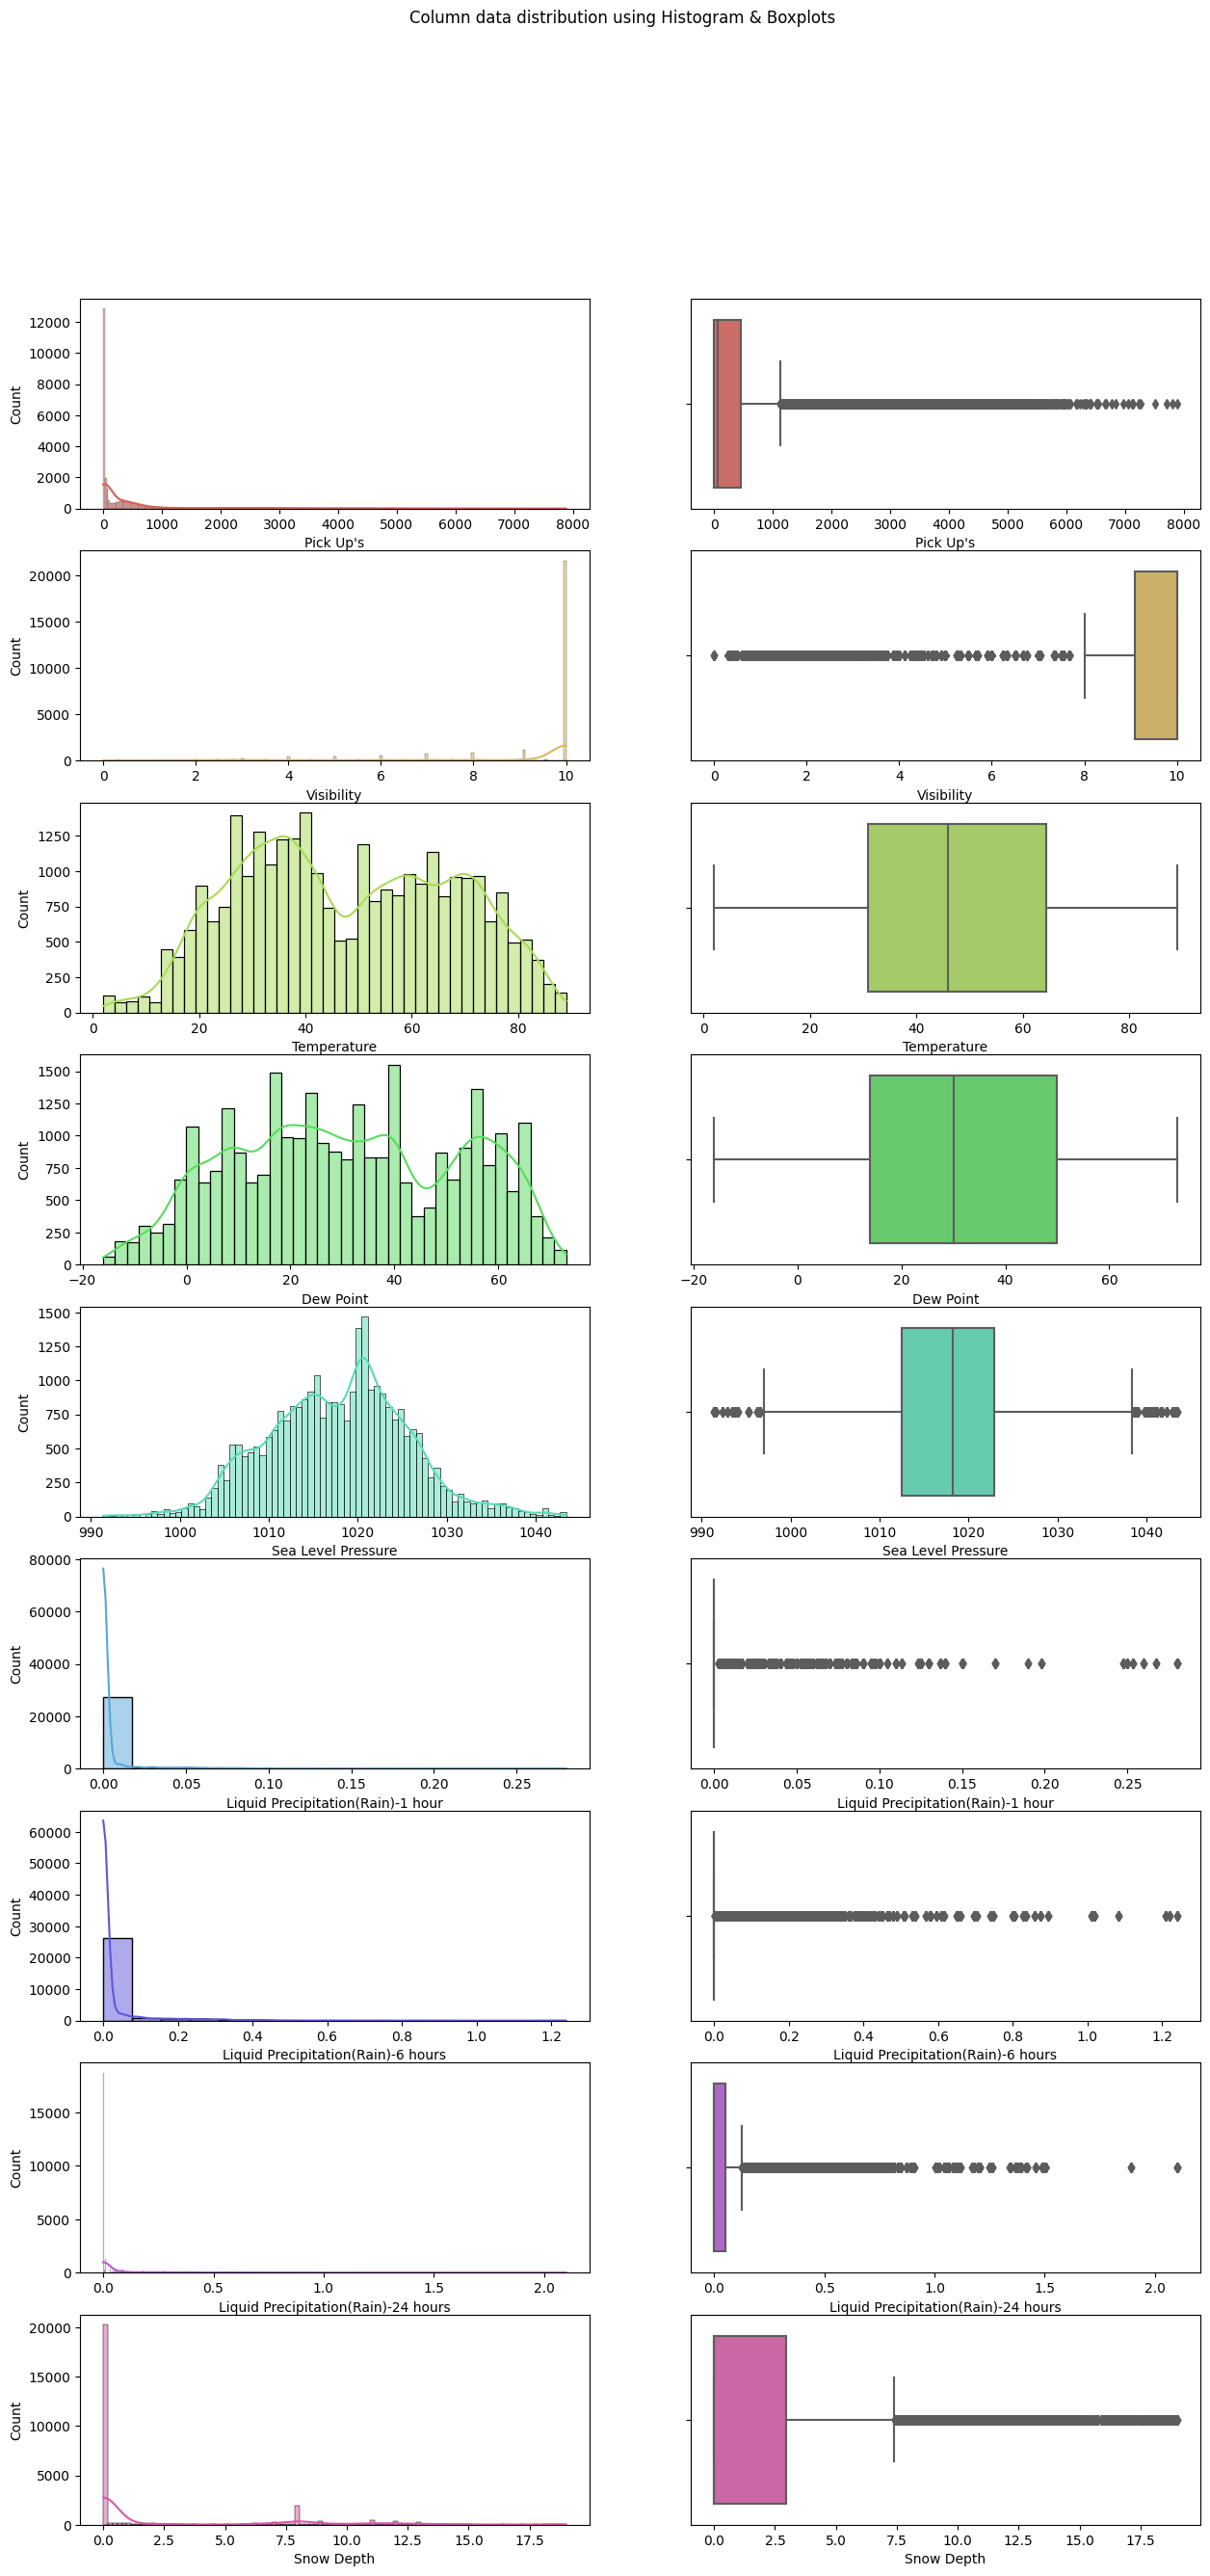

In [76]:
eda_cols = ['pickups', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06','pcp24', 'sd']
plot_xaxis = ['Pick Up\'s', 'Visibility', 'Temperature', 'Dew Point', 'Sea Level Pressure', 'Liquid Precipitation(Rain)-1 hour', 'Liquid Precipitation(Rain)-6 hours','Liquid Precipitation(Rain)-24 hours', 'Snow Depth']
counter = -1
plot_cols = 2 
plot_rows = len(eda_cols)
eda_colors = sns.color_palette("hls", plot_rows)


fig, axs = plt.subplots(plot_rows, plot_cols, figsize=(15,30))
fig.suptitle('Column data distribution using Histogram & Boxplots')
# axs.set_title(r'$d_n$')
# axs.set_xlabel(r'max($F_{a,max}$)')
# axs.set_ylabel(r'$\tau_{ken}$')


# Plotting Histograms
for i in range(0, plot_rows):
    counter +=1
    for j in range(0,plot_cols):
        if j == 0:
            sns.histplot(data = df, x = eda_cols[counter], kde=True, color=eda_colors[counter], ax=axs[i, j])
        elif j == 1:
            sns.boxplot(data = df, x = eda_cols[counter], color=eda_colors[counter], ax=axs[i, j])
        axs[i, j].set_xlabel(plot_xaxis[counter])
        

plt.show()


### Observations:
#### Pickups
The pickups distribution is heavyly right skewed.
There are many outliers which was also noticed in the statistical description; the difference between the third quartile and the maximum value was huge which can be observed from the box plot. As can be seen here, some pickups are close to 8000.
Maximum pickups are in the range of 0-1000

#### Visibility:
The distribution of visibility is heavily left skewed and
There are many outliers
And more than 3/4th of the visibility values are in the range of 9-10
All mean, median and mode are high; so the visibility is good on most days.
There are outliers too indicating some days have low visibility which matches the fact that the data conatins winter months
a good comparison would be to check if the visibility affects the pickups.

#### Temperature
There is even distribution of the temperature

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      29101 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int64  
 13  start_month  29101 non-null  object 
 14  start_day    29101 non-null  int64  
 15  week_day     29101 non-null  object 
 16  start_hour   29101 non-null  int64  
dtypes: float64(9), int64(4), object(4)
memory usage: 3.8+ MB
